In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [4]:
X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [5]:
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2)
model.compile(loss = "mse", optimizer = optimizer, metrics = ["RootMeanSquaredError"])
norm_layer.adapt(X_train)

c:\Users\natha\Documents\GitHub\Deep-Learning-with-Keras-TensorFlow-book\env\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
tf.keras.utils.plot_model(model, "model_california_housing.png", show_shapes = True, show_layer_activations = True, show_trainable = True);

In [7]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8763 - loss: 0.8131 - val_RootMeanSquaredError: 1.4091 - val_loss: 1.9857
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - RootMeanSquaredError: 0.6169 - loss: 0.3808 - val_RootMeanSquaredError: 1.6824 - val_loss: 2.8305
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - RootMeanSquaredError: 0.6187 - loss: 0.3836 - val_RootMeanSquaredError: 0.6194 - val_loss: 0.3836
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - RootMeanSquaredError: 0.5895 - loss: 0.3476 - val_RootMeanSquaredError: 0.5633 - val_loss: 0.3173
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - RootMeanSquaredError: 0.5882 - loss: 0.3460 - val_RootMeanSquaredError: 0.5459 - val_loss: 0.2980
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - RootMeanSquaredError: 0.5577 - loss: 0.3112 - val_RootMeanSquaredError: 0.5458 - val_loss: 0.2979
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - RootMeanSquaredError: 

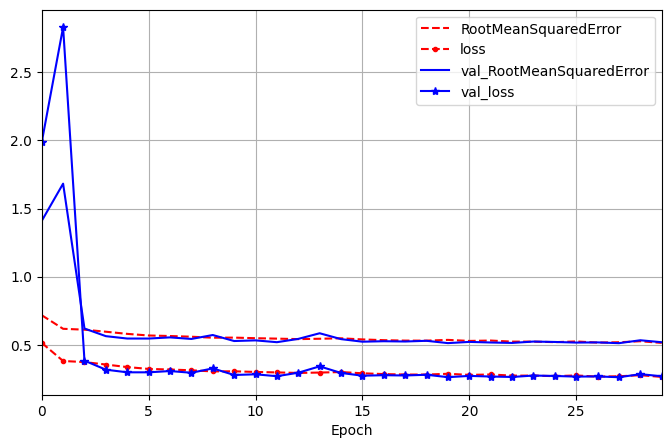

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize = (8, 5), xlim = [0, len(history.epoch) - 1], grid = True, xlabel = "Epoch", style = ["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [9]:
mse_test, rmse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - RootMeanSquaredError: 0.5338 - loss: 0.2851
